In [138]:
%%html
<style>
.prompt {
    visibility: hidden;
}

section:nth-child(2) .fragment:nth-child(2) .inner_cell, .cell:nth-child(3) .inner_cell    
{
    display: none !important;
}
body > div > div > section:nth-child(2) .fragment:nth-child(2), .cell:nth-child(3)
{
    margin-top: -100px;
    margin-right: -200px;
    -moz-transform: scaleX(-1);
    -o-transform: scaleX(-1);
    -webkit-transform: scaleX(-1);
    transform: scaleX(-1);
    filter: FlipH;
    -ms-filter: "FlipH";
}
</style>

# How to spot a Bear - Intro to Machine Learning
## by Bowei Yao & Ramsey D'silva
## Mackenzie Investments
### Information Services - Investment Management

In [114]:
from IPython.display import HTML
HTML('<img src="gifs/bear.gif">')

## Feature engineering

In [1]:
import pandas as pd
import numpy as np
import warnings

from IPython.core.display import Image, HTML
from helpers import get_image, get_images, get_pca
from plot import plot2D, plot3D, animate2D, plot_decision_regions
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=RuntimeWarning)

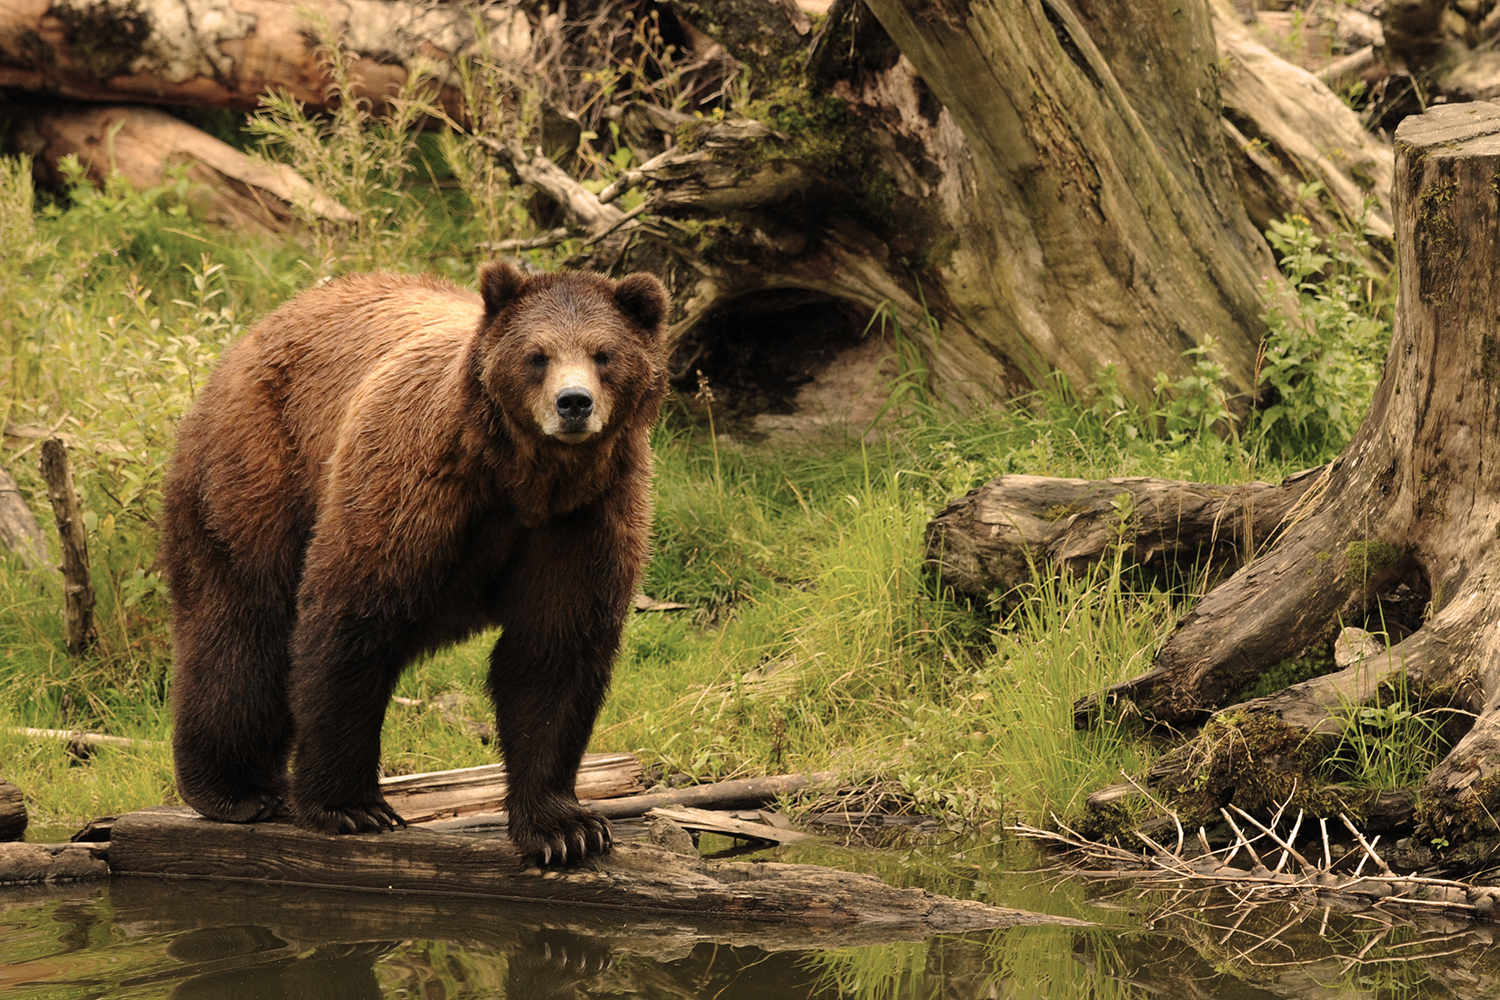

In [2]:
Image(filename='images/bear.jpg', width=500) 


* Machine Learning is the field of programming that tries to make computers mimic human's range of learning, reasoning and decision making
* How would you spot a bear if you saw one in the woods?
* What are the features you would look for?
* What features would you select?

In [3]:
df = pd.DataFrame(
    columns=['Image', 'Number of legs', 'Bear?'],
    data=[[get_image('bear'), 4, 'Yes']],
    index=['Grizzly bear'])
HTML(df.to_html(escape=False))

,Image,Number of legs,Bear?
Grizzly bear,,4,Yes


## But table has 4 legs too

In [4]:
df = df.append(pd.Series([get_image('table'), 4, 'No'], index=df.columns, name='Table'))
HTML(df.to_html(escape=False))

,Image,Number of legs,Bear?
Grizzly bear,,4,Yes
Table,,4,No


## Add number of eyes

In [5]:
df.insert(2, 'Number of eyes', [2, 0])
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Bear?
Grizzly bear,,4,2,Yes
Table,,4,0,No


## Add weight

In [6]:
df.insert(3, 'Weight (kg)', [300, 5])
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Weight (kg),Bear?
Grizzly bear,,4,2,300,Yes
Table,,4,0,5,No


## But zebra eyes 4 eyes, 4 legs and weighs as much as a bear too

In [7]:
df = df.append(pd.Series([get_image('zebra'), 4, 2, 300, 'No'], index=df.columns, name='Zebra'))
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Weight (kg),Bear?
Grizzly bear,,4,2,300,Yes
Table,,4,0,5,No
Zebra,,4,2,300,No


In [8]:
df.insert(4, 'Color', ['Brown', 'Brown', 'B&W'])
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Weight (kg),Color,Bear?
Grizzly bear,,4,2,300,Brown,Yes
Table,,4,0,5,Brown,No
Zebra,,4,2,300,B&W,No


In [9]:
df = df.append(pd.Series([get_image('walrus'), 4, 2, 350, 'Brown', 'No'], index=df.columns, name='Walrus'))
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Weight (kg),Color,Bear?
Grizzly bear,,4,2,300,Brown,Yes
Table,,4,0,5,Brown,No
Zebra,,4,2,300,B&W,No
Walrus,,4,2,350,Brown,No


In [10]:
df = df.append(pd.Series([get_image('panda'), 4, 2, 100, 'B&W', 'Yes'], index=df.columns, name='Panda'))
df = df.append(pd.Series([get_image('polar_bear'), 4, 2, 300, 'White', 'Yes'], index=df.columns, name='Polar bear'))
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Weight (kg),Color,Bear?
Grizzly bear,,4,2,300,Brown,Yes
Table,,4,0,5,Brown,No
Zebra,,4,2,300,B&W,No
Walrus,,4,2,350,Brown,No
Panda,,4,2,100,B&W,Yes
Polar bear,,4,2,300,White,Yes


In [11]:
df.insert(5, 'Texture', ['Long fur', 'Wood', 'Short fur', 'Leather', 'Long fur', 'Long fur'])
df.insert(6, 'Sound', ['Roar', 'None', 'Grunt', 'Moan', 'Roar', 'Roar'])
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Weight (kg),Color,Texture,Sound,Bear?
Grizzly bear,,4,2,300,Brown,Long fur,Roar,Yes
Table,,4,0,5,Brown,Wood,None,No
Zebra,,4,2,300,B&W,Short fur,Grunt,No
Walrus,,4,2,350,Brown,Leather,Moan,No
Panda,,4,2,100,B&W,Long fur,Roar,Yes
Polar bear,,4,2,300,White,Long fur,Roar,Yes


In [12]:
df = df.append(pd.Series([get_image('tiger'), 4, 2, 300, 'Light brown', 'Short fur', 'Roar', 'No'], index=df.columns, name='Tiger'))
df = df.append(pd.Series([get_image('lion'), 4, 2, 200, 'Striped', 'Short fur', 'Roar', 'No'], index=df.columns, name='Lion'))
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Weight (kg),Color,Texture,Sound,Bear?
Grizzly bear,,4,2,300,Brown,Long fur,Roar,Yes
Table,,4,0,5,Brown,Wood,None,No
Zebra,,4,2,300,B&W,Short fur,Grunt,No
Walrus,,4,2,350,Brown,Leather,Moan,No
Panda,,4,2,100,B&W,Long fur,Roar,Yes
Polar bear,,4,2,300,White,Long fur,Roar,Yes
Tiger,,4,2,300,Light brown,Short fur,Roar,No
Lion,,4,2,200,Striped,Short fur,Roar,No


In [13]:
df.insert(7, 'Lifespan', [25, 0, 30, 30, 20, 20, 22, 12])
df.insert(8, 'Claw length (cm)', [15, 0, 0, 0, 10, 20, 5, 5])
HTML(df.to_html(escape=False))

,Image,Number of legs,Number of eyes,Weight (kg),Color,Texture,Sound,Lifespan,Claw length (cm),Bear?
Grizzly bear,,4,2,300,Brown,Long fur,Roar,25,15,Yes
Table,,4,0,5,Brown,Wood,None,0,0,No
Zebra,,4,2,300,B&W,Short fur,Grunt,30,0,No
Walrus,,4,2,350,Brown,Leather,Moan,30,0,No
Panda,,4,2,100,B&W,Long fur,Roar,20,10,Yes
Polar bear,,4,2,300,White,Long fur,Roar,20,20,Yes
Tiger,,4,2,300,Light brown,Short fur,Roar,22,5,No
Lion,,4,2,200,Striped,Short fur,Roar,12,5,No


In [14]:
df = df.drop(['Number of legs', 'Number of eyes'], axis=1)
HTML(df.to_html(escape=False))

,Image,Weight (kg),Color,Texture,Sound,Lifespan,Claw length (cm),Bear?
Grizzly bear,,300,Brown,Long fur,Roar,25,15,Yes
Table,,5,Brown,Wood,None,0,0,No
Zebra,,300,B&W,Short fur,Grunt,30,0,No
Walrus,,350,Brown,Leather,Moan,30,0,No
Panda,,100,B&W,Long fur,Roar,20,10,Yes
Polar bear,,300,White,Long fur,Roar,20,20,Yes
Tiger,,300,Light brown,Short fur,Roar,22,5,No
Lion,,200,Striped,Short fur,Roar,12,5,No


In [15]:
df = df.rename(columns={'Texture': 'Fur length (cm)', 'Sound': 'Loudness (db)', 'Color': 'Pixel intensity'})
df['Pixel intensity'] = [190, 220, 140, 150, 200, 40, 150, 120]
df['Fur length (cm)'] = [17, 0, 5, 0, 13, 16, 6, 4]
df['Loudness (db)'] = [120, 0, 30, 50, 70, 130, 90, 100]
df['Bear?'] = [1, 0, 0, 0, 1, 1, 0, 0]
HTML(df.to_html(escape=False))

,Image,Weight (kg),Pixel intensity,Fur length (cm),Loudness (db),Lifespan,Claw length (cm),Bear?
Grizzly bear,,300,190,17,120,25,15,1
Table,,5,220,0,0,0,0,0
Zebra,,300,140,5,30,30,0,0
Walrus,,350,150,0,50,30,0,0
Panda,,100,200,13,70,20,10,1
Polar bear,,300,40,16,130,20,20,1
Tiger,,300,150,6,90,22,5,0
Lion,,200,120,4,100,12,5,0


## Feature engineering Tips

* Choose independent features
* Normalize values
* Convert non numerical features to numeric value

## Add more data!

* Allows model to generalize better
* Removes bias that are inherent in small datasets

### Both positive

In [16]:
df = df.append(pd.Series([get_image('babybear'), 100, 165, 13, 100, 23, 9, 1], index=df.columns, name='Baby bear'))
df = df.append(pd.Series([get_image('blackbear'), 220, 235, 15, 90, 17, 10, 1], index=df.columns, name='Black bear'))
df = df.append(pd.Series([get_image('mamabear'), 320, 190, 18, 120, 27, 15, 1], index=df.columns, name='Mother bear'))
df = df.append(pd.Series([get_image('papabear'), 350, 215, 19, 120, 22, 16, 1], index=df.columns, name='Father bear'))
HTML(df.to_html(escape=False))

,Image,Weight (kg),Pixel intensity,Fur length (cm),Loudness (db),Lifespan,Claw length (cm),Bear?
Grizzly bear,,300,190,17,120,25,15,1
Table,,5,220,0,0,0,0,0
Zebra,,300,140,5,30,30,0,0
Walrus,,350,150,0,50,30,0,0
Panda,,100,200,13,70,20,10,1
Polar bear,,300,40,16,130,20,20,1
Tiger,,300,150,6,90,22,5,0
Lion,,200,120,4,100,12,5,0
Baby bear,,100,165,13,100,23,9,1
Black bear,,220,235,15,90,17,10,1


### And negative

In [17]:
df = df.append(pd.Series([get_image('monkey'), 40, 165, 4, 60, 18, 3, 0], index=df.columns, name='Monkey'))
df = df.append(pd.Series([get_image('goose'), 10, 125, 0, 65, 16, 0, 0], index=df.columns, name='Goose'))
df = df.append(pd.Series([get_image('duck'), 5, 140, 0, 45, 7, 0, 0], index=df.columns, name='Duck'))
df = df.append(pd.Series([get_image('fox'), 30, 160, 5, 45, 4, 3, 0], index=df.columns, name='Fox'))
df = df.append(pd.Series([get_image('moose'), 500, 170, 3, 55, 20, 0, 0], index=df.columns, name='Moose'))
HTML(df.to_html(escape=False))

,Image,Weight (kg),Pixel intensity,Fur length (cm),Loudness (db),Lifespan,Claw length (cm),Bear?
Grizzly bear,,300,190,17,120,25,15,1
Table,,5,220,0,0,0,0,0
Zebra,,300,140,5,30,30,0,0
Walrus,,350,150,0,50,30,0,0
Panda,,100,200,13,70,20,10,1
Polar bear,,300,40,16,130,20,20,1
Tiger,,300,150,6,90,22,5,0
Lion,,200,120,4,100,12,5,0
Baby bear,,100,165,13,100,23,9,1
Black bear,,220,235,15,90,17,10,1


### Visualizing correlations

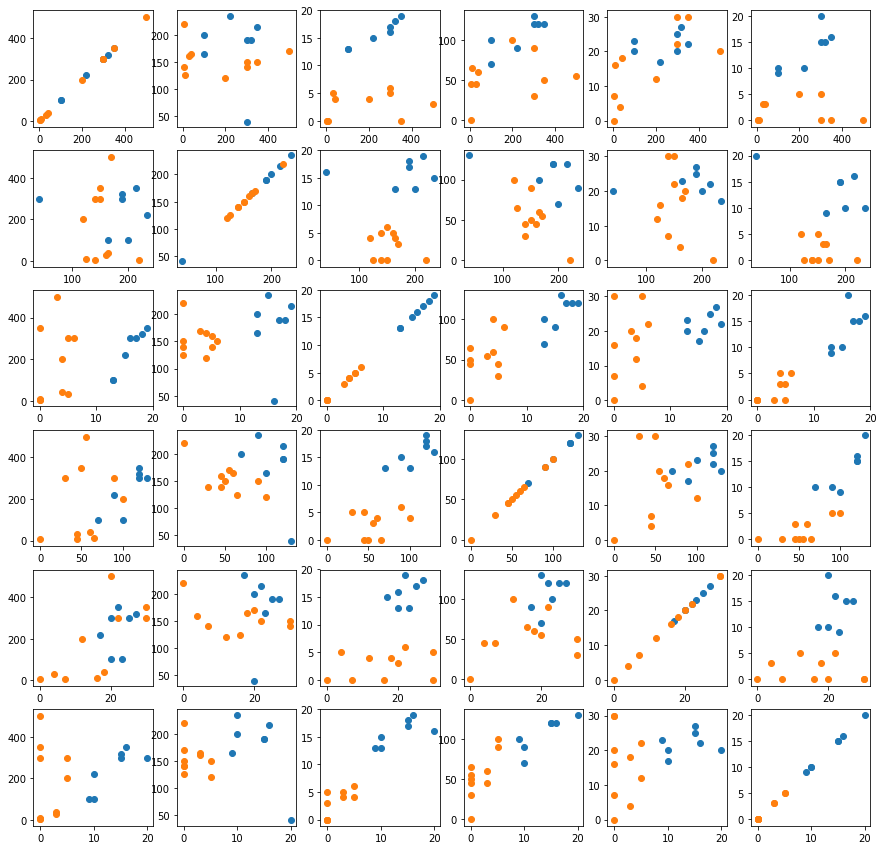

In [18]:
columns = list(df.columns[i] for i in [1, 2, 3, 4, 5, 6])
fig, sub = plt.subplots(6, 6, figsize=(15, 15))

yes = df['Bear?'] == 1
dfs = [df[yes], df[~yes]]
for row, x in zip(sub, df[columns]):
    for ax, y in zip(row, df[columns]):
        for _df, color in zip(dfs, ['r', 'b']):
            ax.scatter(_df[x], _df[y])
        
plt.show()

### Prinicipal Components

* Collapses multi-dimensions into projection into n axes that preserve the most variation in the data

### PCA in 2 dimensions

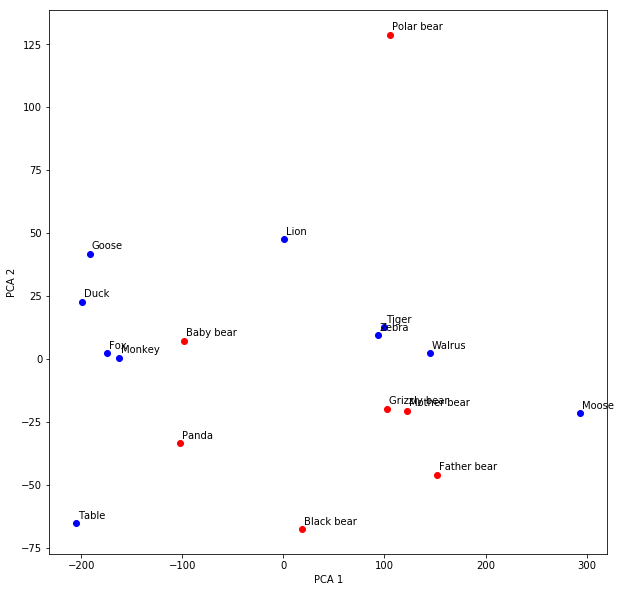

In [19]:
df_pca2d = get_pca(2, df[columns])
df_pca2d['Bear?'] = df['Bear?']
yes = df_pca2d['Bear?'] == 1
plot2D(*(df_pca2d[yes], df_pca2d[~yes]), columns=[df_pca2d.columns[i] for i in [0, 1]], figsize=(10, 10), plot_titles=True)

### PCA in 3 dimensions

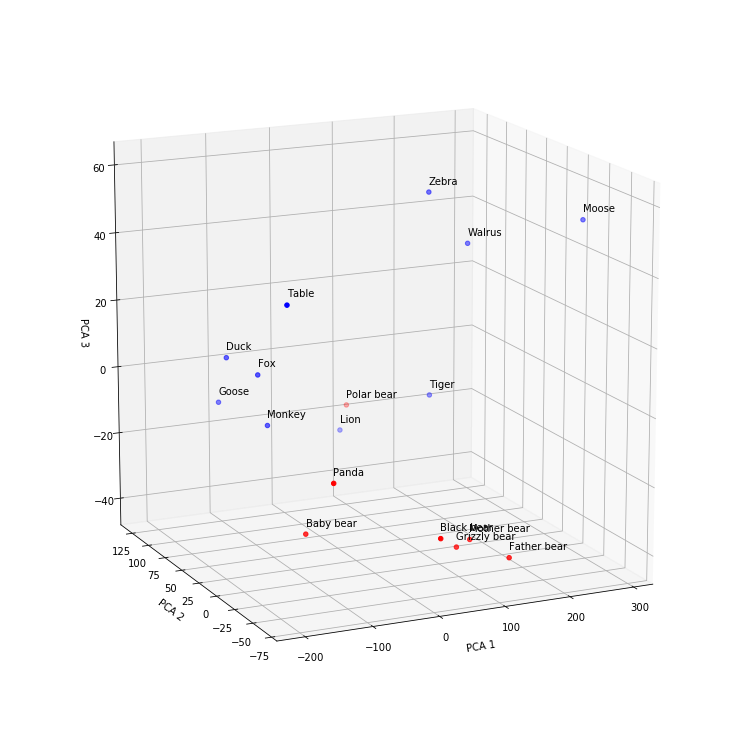

In [20]:
df_pca3d = get_pca(3, df[columns])
df_pca3d['Bear?'] = df['Bear?']
yes = df_pca3d['Bear?'] == 1
plot3D(*(df_pca3d[yes], df_pca3d[~yes]), columns=[df_pca3d.columns[i] for i in [0, 1, 2]], figsize=(10, 10), plot_titles=True)

## SVM

In [49]:
df_pca2d[yes].reset_index(drop=True)
df_no = df_pca2d[~yes].reset_index(drop=True)
df_zipped = pd.concat([df_yes, df_no]).sort_index()
anim = animate2D(df_zipped, factor=100.0)
HTML(anim.to_html5_video())

# Data Science vs Machine Learning

## Traditional techniques
* Hand program the equations, calculations
* Hand program the features, ratios etc.
* Non scalable
* Hard, non-intuitive, not how humans think

## New techniques
* Scalable
* No hand programming equations for features
* Hand programming structure of network
* Modeled based on how humans think

## Neural Networks

In [22]:
import neural_network as nn

SEED = 20170914
ITERATION_COUNT = 1500
DELTA = 0.001

training_input = (df.iloc[:, 1:7].transform(lambda x: x / 100.0)).values
print("Training input: ")
print(training_input)
training_output = df.iloc[:, 7].values
print("Training output: ")
print(training_output)

my_nn = nn.NeuralNetwork(6, 1, SEED)
print("Random starting synaptic weights: ")
print(my_nn.synaptic_weights)

print ("Training by iterations: ")
errors = my_nn.train(np.array(training_input), np.array([training_output]).T, ITERATION_COUNT)
print ("New synaptic weights after training: ")
print (my_nn.synaptic_weights)

# Test the neural network with a new situation.
print ("Considering new situation [2.26, 1.78, .09, .78, .19, .09] -> ?: ")
print (my_nn.predict(np.array([2.26, 1.78, .09, .78, .19, .09])))
print (my_nn.predict(np.array([.26, .38, .10, .56, .20, .07])))
print (my_nn.predict(np.array([3, 1.9, .17, 1.2, .25, .15])))
print (my_nn.predict(np.array([3, 1.4, 0.05, 0.3, 0.3, 0])))

print ("Untrain neural network: ")
my_nn.untrain()
print(my_nn.synaptic_weights)

print ("Training until fit: ")
my_nn.train_until_fit(np.array(training_input), np.array([training_output]).T, error_delta=DELTA)
print ("New synaptic weights after training: ")
print (my_nn.synaptic_weights)

# Test the neural network again
print ("Considering new situation [2.26, 1.78, .09, .78, .19, .09] -> ?: ")
print (my_nn.predict(np.array([2.26, 1.78, .09, .78, .19, .09])))
print (my_nn.predict(np.array([.26, .38, .10, .56, .20, .07])))
list(range(ITERATION_COUNT))[::10]print (my_nn.predict(np.array([3, 1.9, .17, 1.2, .25, .15])))
print (my_nn.predict(np.array([3, 1.4, 0.05, 0.3, 0.3, 0])))

Training input: 
[[ 3.    1.9   0.17  1.2   0.25  0.15]
 [ 0.05  2.2   0.    0.    0.    0.  ]
 [ 3.    1.4   0.05  0.3   0.3   0.  ]
 [ 3.5   1.5   0.    0.5   0.3   0.  ]
 [ 1.    2.    0.13  0.7   0.2   0.1 ]
 [ 3.    0.4   0.16  1.3   0.2   0.2 ]
 [ 3.    1.5   0.06  0.9   0.22  0.05]
 [ 2.    1.2   0.04  1.    0.12  0.05]
 [ 1.    1.65  0.13  1.    0.23  0.09]
 [ 2.2   2.35  0.15  0.9   0.17  0.1 ]
 [ 3.2   1.9   0.18  1.2   0.27  0.15]
 [ 3.5   2.15  0.19  1.2   0.22  0.16]
 [ 0.4   1.65  0.04  0.6   0.18  0.03]
 [ 0.1   1.25  0.    0.65  0.16  0.  ]
 [ 0.05  1.4   0.    0.45  0.07  0.  ]
 [ 0.3   1.6   0.05  0.45  0.04  0.03]
 [ 5.    1.7   0.03  0.55  0.2   0.  ]]
Training output: 
[1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0]
Random starting synaptic weights: 
[[ 0.30483703]
 [-0.85587707]
 [-0.51394683]
 [-0.59351685]
 [-0.10268851]
 [ 0.84926039]]
Training by iterations: 
New synaptic weights after training: 
[[ -0.32823736]
 [ -1.80754239]
 [ 34.00444303]
 [ -1.45963702]
 [ -1.317482

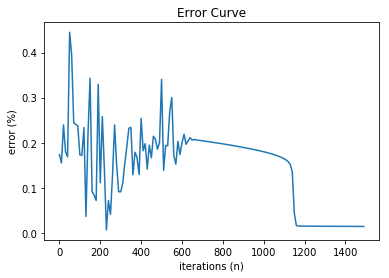

In [30]:
ax = plt.subplot()
ax.plot(range(ITERATION_COUNT)[::10], errors[::10])
plt.xlabel('iterations (n)')
plt.ylabel('error (%)')
plt.title('Error Curve')

plt.show()

# FAQ